In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
advertising=pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


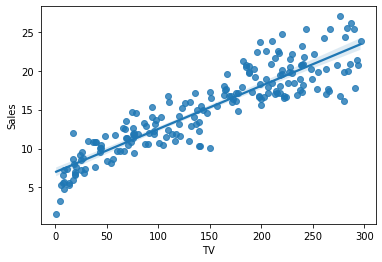

In [6]:
sb.regplot(x="TV",y="Sales",data=advertising)

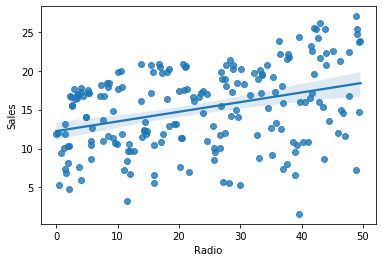

In [7]:
sb.regplot(x="Radio",y="Sales",data=advertising)

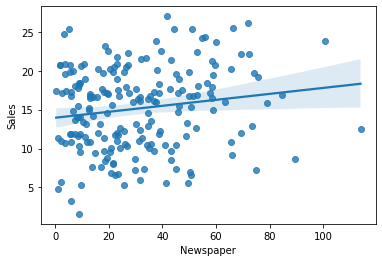

In [8]:
sb.regplot(x="Newspaper",y="Sales",data=advertising)

C:\Users\SIDDHESH\anaconda3\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


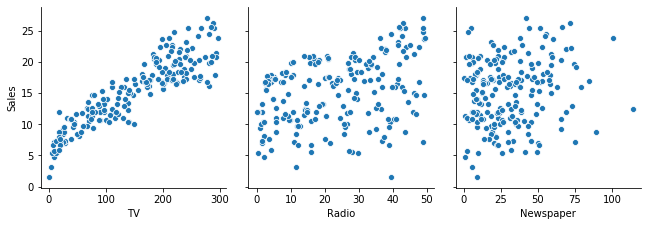

In [9]:
sb.pairplot(x_vars=["TV","Radio","Newspaper"],y_vars="Sales",data=advertising,size=3,kind="scatter")

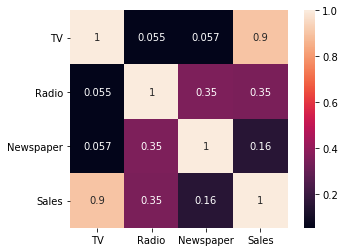

In [10]:
sb.heatmap(advertising.corr(),square=True,annot=True)

In [11]:
import statsmodels
import statsmodels.api as sm

In [12]:
import sklearn

In [13]:
X=advertising["TV"]
y=advertising["Sales"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#spliting data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [17]:
#traning model with statsmodels
X_train_sm=sm.add_constant(X_train)#add the constant
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [18]:
# fitting model OLS-ordinary least squares
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params# looking to coefficents

const    6.948683
TV       0.054546
dtype: float64

In [19]:
#y=mx+c
#sales=0.05(TV)+6.94

In [20]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           1.52e-52
Time:                        22:52:38   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#coefficient anf p-value
#R-squared is very high 
# probability of F-Statistic is very low i.e the fit is not by chance

In [22]:
y_train_pre=lr_model.predict(X_train_sm)

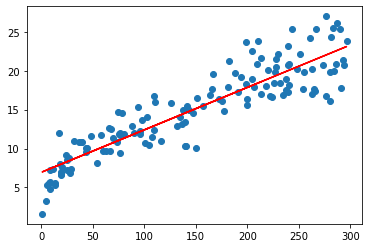

In [23]:
plt.scatter(X_train,y_train)
#plt.plot(X_train,6.9487 + 0.0545*X_train,"r")#predicted
plt.plot(X_train,y_train_pre,"r")#6.9487 + 0.0545*X_train=y_train_pre

In [24]:
#error analysis
#error=f(y_train,y_train_pre)

In [25]:
#residuals
res=y_train - y_train_pre

Text(0.5, 1.0, 'Residuals')

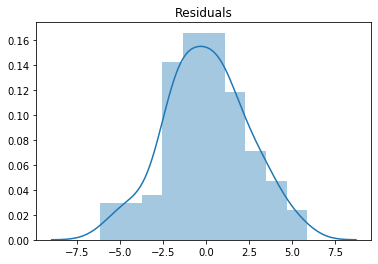

In [26]:
#plot residuals
plt.figure()
sb.distplot(res)
plt.title("Residuals")

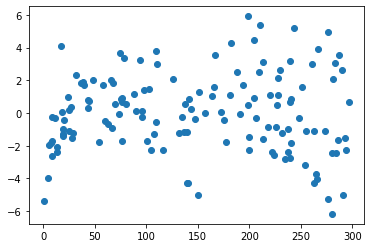

In [27]:
#looking patters
plt.scatter(X_train,res)
plt.show()

In [28]:
#predicting and evaluating,r-square

In [29]:
X_test_sm=sm.add_constant(X_test)
#predict
y_test_pre=lr_model.predict(X_test_sm)

In [30]:
y_test_pre.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [31]:
#evaluating ,R-squared

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [33]:
# R2 on test values
r2=r2_score(y_true=y_test,y_pred=y_test_pre)

In [34]:
r2

0.7921031601245658

In [35]:
# R2 on train set
r3=r2_score(y_true=y_train,y_pred=y_train_pre)
r3

0.8157933136480389

In [36]:
# mean_sqaured_error
mean_squared_error(y_true=y_test,y_pred=y_test_pre)

4.077556371826956

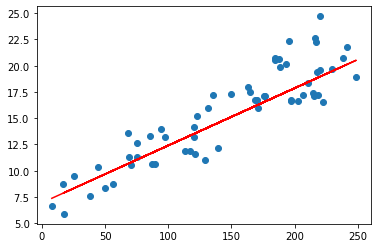

In [37]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pre,"r")
plt.show()

In [38]:
# Linear regression sklearn

In [39]:
#spliting data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
# creating an linear regression
lm=LinearRegression()

In [50]:
# reshaping the x_train because sklearn has expected 2d array
X_train_lm=X_train.values.reshape(-1,1)
#also for y_test
X_test_lm=X_test.values.reshape(-1,1)

In [45]:
#fitting the model
lm.fit(X_train_lm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#see the parameters and make predictions -help(lm)
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [51]:
#make the prediction
y_train_pre=lm.predict(X_train_lm)
# we basically do predictions on test data to know the difference we have taken train dataset aslo
y_test_pre=lm.predict(X_test_lm)

In [53]:
#evaluation of model
print(r2_score(y_true=y_train,y_pred=y_train_pre))
print(r2_score(y_true=y_test,y_pred=y_test_pre))

0.8157933136480389
0.7921031601245662
